In [2]:
import warnings
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("mushrooms.csv")

In [4]:
df.shape

(8124, 23)

In [5]:
pd.set_option("display.max_columns",None)

In [6]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [7]:
null_sum=df.isnull().sum()
null_ratio=df.isnull().sum()/df.shape[0]
pd.DataFrame([null_sum,null_ratio],index=["null_sum","null_ratio"])

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
null_sum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
null_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
pd.DataFrame([df.nunique(),df.dtypes],index=["num_unique","dtype"])

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
num_unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
dtype,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object


In [9]:
for i in df:
    df[i]=df[i].astype("category")
df.info()        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   class                     8124 non-null   category
 1   cap-shape                 8124 non-null   category
 2   cap-surface               8124 non-null   category
 3   cap-color                 8124 non-null   category
 4   bruises                   8124 non-null   category
 5   odor                      8124 non-null   category
 6   gill-attachment           8124 non-null   category
 7   gill-spacing              8124 non-null   category
 8   gill-size                 8124 non-null   category
 9   gill-color                8124 non-null   category
 10  stalk-shape               8124 non-null   category
 11  stalk-root                8124 non-null   category
 12  stalk-surface-above-ring  8124 non-null   category
 13  stalk-surface-below-ring  8124 non-null   catego

In [10]:
columns=df.columns.tolist()
columns.append(columns.pop(columns.index("class")))
df=df[columns]

In [11]:
df.duplicated().sum()

0

In [12]:
df.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7,2
top,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d,e
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148,4208


<function matplotlib.pyplot.show(close=None, block=None)>

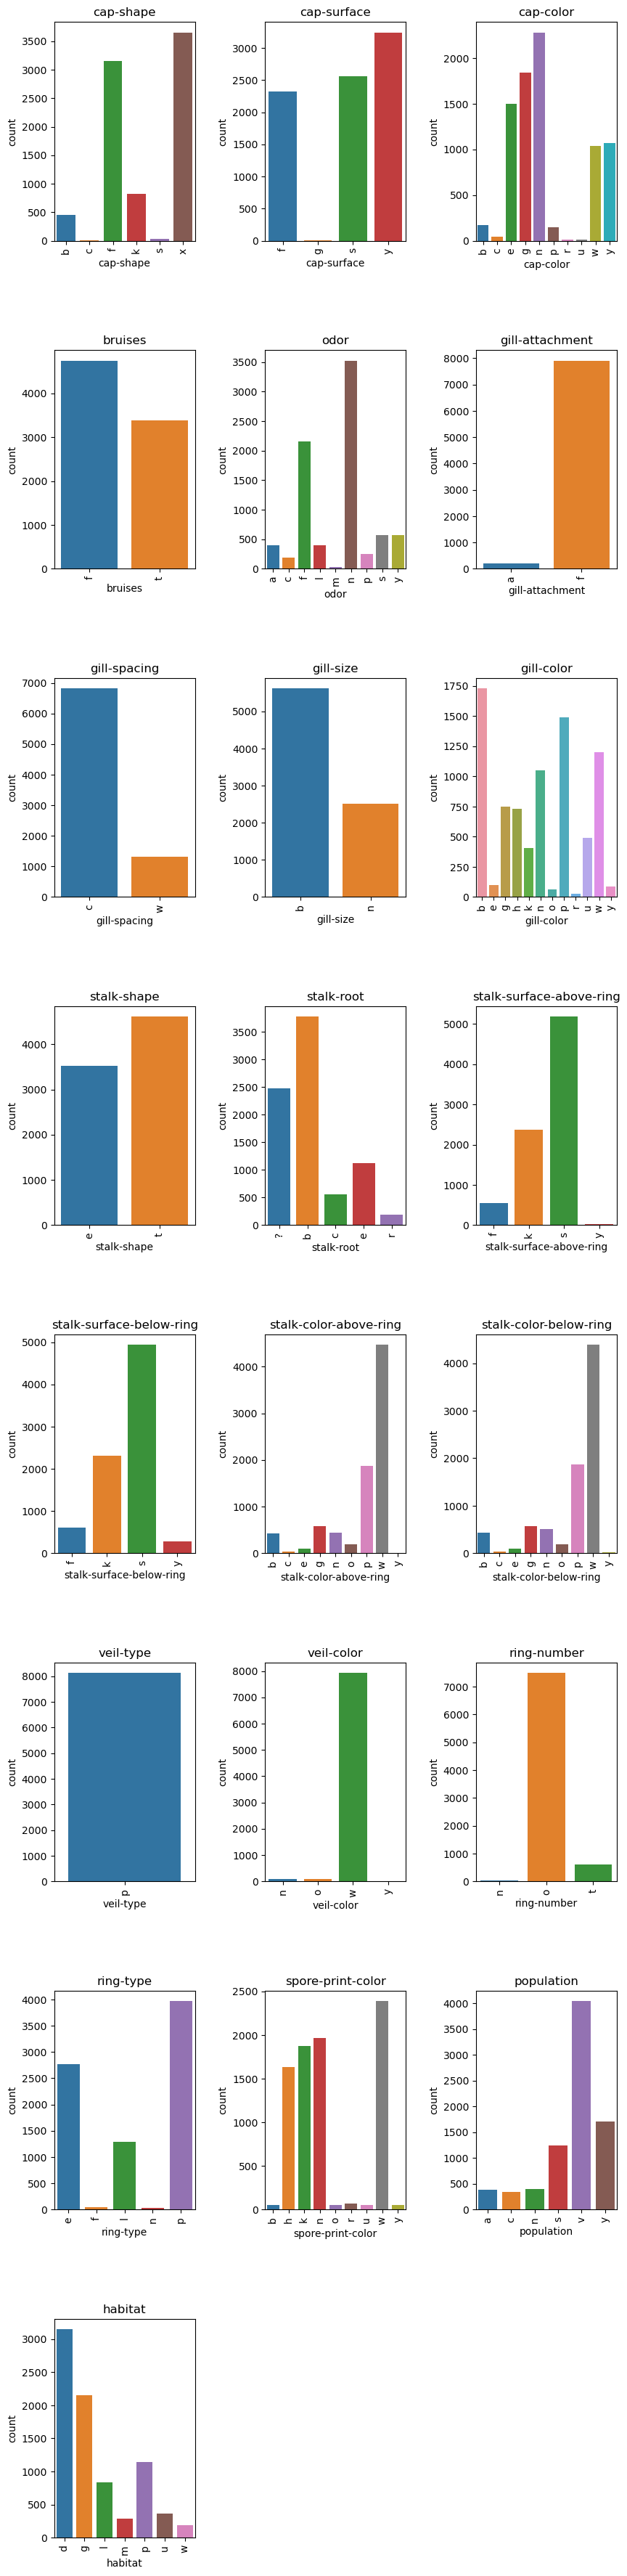

In [13]:
plt.figure(figsize=(10,45))
for i,col in enumerate (df.columns[:-1]):
    plt.subplot(8,3,i+1)
    sns.countplot(x=col, data=df)
    plt.title(col)
    plt.xticks(rotation=90)
plt.subplots_adjust(wspace=.5,hspace=.5)
plt.show

In [14]:
df.drop("veil-type",axis=1,inplace=True)

# Split data

In [15]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1:]

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=19)

# Encoding

In [17]:
# one hot encoding
x_train=pd.get_dummies(x_train,columns=df.columns[:-1])
x_test=pd.get_dummies(x_test,columns=df.columns[:-1])

In [18]:
x_train.shape

(6093, 116)

In [19]:
# label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df["class"] = label_encoder.fit_transform(df["class"])

In [20]:
 y_train

,class
400,e
825,e
502,e
4746,p
4674,p
...,...
5032,p
1378,p
757,e
2670,e


# ML

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn= KNeighborsClassifier()
param_grid={
    "n_neighbors":np.arange(1,50),
    "weights":["uniform","distance"],
    "metric":["cosine","infinity","sokalnichener","euclidean"],
    "p":[1,2,3,4]
}
grid_search=GridSearchCV(knn,param_grid,cv=5)
grid_search.fit(x,y)
print ("best is : ",grid_search.best_params_)

best is :  {'metric': 'cosine', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}


In [40]:
knn= KNeighborsClassifier(metric="cosine",n_neighbors=3,p=1,weights="uniform")
knn.fit(x_train,y_train)

from sklearn.metrics import accuracy_score

tr_pred = knn.predict(x_train)
ts_pred = knn.predict(x_test)

tr_acc = accuracy_score(y_train, tr_pred)
ts_acc = accuracy_score(y_test, ts_pred)

print(tr_acc)
print(ts_acc)

1.0
1.0
